## Linearna regresija

Parametri: $\beta_0$, $\beta_1$, ..., $\beta_m$ <br>
Atributi/prediktori: $X_1$, $X_2$, ..., $X_m$ <br> 
Ciljna promenljiva: $y$ koja je oblika $$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_mX_m$$ 

**Prosta linearna regresija (Simple linear regression)**: $f(x) = \beta_0 + \beta_1x$. 

<img src='linearna_regresija.png'>

### scikit-learn 

Installation: **pip install -U scikit-learn**

Python bibloteka koja se specijalno koristi za zadatke masinskog ucenja.

[Koristan tutorijal](https://scikit-learn.org/)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

* `linear_model` je modul za rad sa linearnim modelima kao sto su linearna regresija, linearna regresija sa regularizacijama, logisticka regresija... 
* `model_selection` je modul koristimo za podelu skupa podataka na skupove za treniranje i testiranje, unakrsne validacije, generisanja stratifikovanih skupova, ... 
* Modul `metrics` daje nam razlicite metrike koje se mogu koristiti u evaluaciji. 

### Izmislila sam je

In [3]:
np.random.seed(7)

In [4]:
N = 100

In [5]:
x = np.linspace(1, 5, N).reshape(N, 1)

In [6]:
y = 11*np.sin(x) + 1.5* np.random.randn(N, 1)

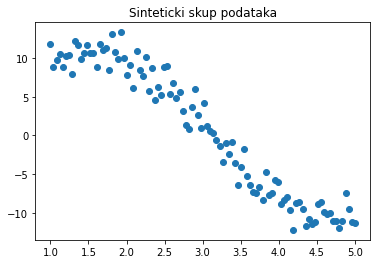

In [7]:
plt.title('Sinteticki skup podataka')
plt.plot(x, y, 'o')
plt.show()

Metod `train_test_split` se koristi za podelu skupa podataka na skup za treniranje i skup za testiranje srazmerno `train_size` i `test_size`. Kako je ova podela na skupove za treniranje i testiranje nasumicna, parametrom `random_state` se vrsi kontrola podele radi potencijalnog reprodukovanja eksperimenata. 

In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=7)

In [9]:
x_train.shape, x_test.shape

((60, 1), (40, 1))

In [10]:
y_train.shape, y_test.shape

((60, 1), (40, 1))

In [ ]:
# Add outlier
# y_train[1] = np.array(-100)

### Pravljenje modela

Trazimo parametre b0 i b1 koji najbolje opisuju ovu zakonitost u nasim podacima: <br>  $f(x) = b_0 + b_1x$.

In [ ]:
model = linear_model.LinearRegression()

`fit` se korisi za treniranje modela **nad skupom za treniranje**

In [ ]:
model.fit(x_train, y_train)

In [ ]:
type(model.coef_)

In [ ]:
model.coef_.shape

In [ ]:
b1 = model.coef_[0][0]
b1

In [ ]:
type(model.intercept_)

In [ ]:
model.intercept_.shape

In [ ]:
b0 = model.intercept_[0]
b0

In [ ]:
plt.title('Model linearne regresije')
plt.plot(x, y, 'o')
plt.plot(x, b0+b1*x)
plt.show()

In [ ]:
# Ako ubacimo outlier iz komentara 
plt.title('Model linearne regresije sa jednom odudarajucom tackom')
plt.plot(x, y, 'o')
plt.plot(x, b0+b1*x)
plt.show()

### Predvidjanje

Za predikciju vrednosti ciljne promenljive nad novim instancama koristi se funkcija `predict`

In [ ]:
new_instance = 4.7
model.predict(np.array([new_instance]).reshape(-1, 1)) # mora da bude u obliku kolone novih vrednosti atributa

### Evaluacija modela

#### Srednjekvadratna greska $MSE$ (mean squared error) 
    
$MSE = \frac{1}{n} \sum_i{(y_i-\hat{y_i})^2}$

In [ ]:
def mean_squared_error(y_true, y_predicted):
    return ((y_true - y_predicted)**2).mean()

#### Koeficijent determinacije $R^2$
    
$R^2 = 1 - \frac{\sum_i{(y_i-\hat{y_i})^2}}{\sum_i{(y_i - \bar{y})^2}}$

In [ ]:
def r_squared(y_true, y_predicted):  
    u = ((y_true - y_predicted)**2).sum()
    y_mean = y_true.mean(); 
    v = ((y_true - y_mean)**2).sum()
    return 1 - u/v

In [ ]:
# predikcije na testnom skupu podataka

In [ ]:
y_predicted = model.predict(x_test) 

In [ ]:
y_predicted

### Nikad ne raditi evaluaciju na skupu podataka za trening modela!!!

In [ ]:
mean_squared_error(y_test, y_predicted)

In [ ]:
r_squared(y_test, y_predicted)

Ugradjene funkcije u paketu `metrics`: `mean_squared_error` i `r2_score`

In [ ]:
mse = metrics.mean_squared_error(y_test, y_predicted)
mse

In [ ]:
r2 = metrics.r2_score(y_test, y_predicted)
r2

In [ ]:
model.score(x_test, y_test) # default value is R2

### Funkcija greske / Loss function

Srednjekvadratna greska (MSE): <BR>$ J(\beta)  = \frac{1}{2} \frac{1}{N} \sum_{i=1}^{N} (\beta_0 + \beta_1x_i -y_i)^2$

In [ ]:
def error_function(beta, x, y):
    beta0 = beta[0]
    beta1 = beta[1]
    
    return 0.5*np.average((beta0 + beta1*x - y)**2)

### Resavanje problema

In [ ]:
# Matricni pristup

Resavamo $X\beta=Y$  tj. $X^TX\beta=X^TY$ u kojoj je $X$ matrica podataka, a $Y$ kolona sa vrednostima ciljne promenljive. <br> Da bi se ovaj sistem resio potrebno je izračunati `Mur-Penrouzov inverz` tj. matricu $(X^TX)^{-1}X^T$. <br> Matrica $P=X(X^TX)^{-1}X^T$ se zove matrica predikcije jer proizvod $PX$ daje ocene ciljne promenljive $Y$.

In [ ]:
train_size = x_train.shape[0]
train_size

In [ ]:
M = np.vstack([np.ones(train_size), x_train.ravel()]).transpose()

In [ ]:
coef_pseudo = np.linalg.pinv(M).dot(y_train)

In [ ]:
print('Koeficijenti modela: ', coef_pseudo[0][0], coef_pseudo[1][0])

In [ ]:
# Optimizacioni pristup 

`Gradientni spust` je optimizacioni metod kojim se iterativno dolazi do optimuma, minimuma ili maksimuma, funkcije tako sto se prate pravci gradijenta (izvoda) funkcije. 

<br>

Vazna pitanja u vezi sa gradijentnim spustom su: 
* Pod kojim uslovima algoritam konvergira?
* Na koji nacin se bira korak učenja?
* Kada zaustaviti algoritam? 
* Na koji nacin se bira $x_0$?

![alt_text](gradient-descent.png)

In [ ]:
def regression_gradient_descent(x, y, error_function, beta, alpha, eps, max_iterations, plot = False):
        
    result = {} 
        
    beta0_old = beta[0]
    beta1_old = beta[1]
    
    error_old = error_function((beta0_old, beta1_old), x, y)
    
    errors = np.empty(0)
    errors = np.append(errors, error_old)
    
        
    for i in np.arange(0, max_iterations):
            
        beta0_update = np.average(beta0_old + beta1_old*x -y)
        beta1_update = np.average((beta0_old + beta1_old*x -y)*x)
                
        beta0_new = beta0_old - alpha*beta0_update
        beta1_new = beta1_old - alpha*beta1_update
            
        error_new = error_function((beta0_new, beta1_new), x, y)
       
        
        if np.abs(error_new - error_old) < eps:
            break
                
        beta0_old = beta0_new
        beta1_old = beta1_new
        
        error_old = error_new
        
        errors = np.append(errors, error_new)
    
                
    result['converge'] = i != max_iterations
    result['number_of_iterations'] = i
    result['b_min'] = (beta0_old, beta1_old)
    
    if plot == True:
        plt.title('Funkcija greske')
        plt.xlabel('Broj iteracija')
        plt.ylabel('Srednjekvadratna greska')
        plt.plot(np.arange(0, i+1), errors)
    
    return result
            

In [ ]:
beta = (3, 1) # nasumicno pocetno resenje
alpha = 0.1 # standardni izbor
# kada dostignemo tacnost eps ili max_iterations broj iteracija prestajemo sa trazenjem resenja
eps = 0.0001 
max_iterations = 1000 

In [ ]:
result = regression_gradient_descent(x, y, error_function, beta, alpha, 0.0001, max_iterations, plot=True)

In [ ]:
result

In [ ]:
print('Koeficijenti linearne regresije dobijeni pomocu gradijentnog spusta su: ', result['b_min'] )

### Standardizacija

Standardizacija podrazumevanje centriranje vrednosti pojedinacnih atributa oko nule i njihovo skaliranje na jedinicnu varijansu.

In [11]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.StandardScaler()

In [ ]:
scaler.fit(x_train.reshape(-1, 1))

### Nikad ne raditi standardizaciju koristeci test skup!!!

In [ ]:
scaler.mean_, scaler.var_ # fitted on x_train 

In [ ]:
np.mean(x_train), np.var(x_train)

In [ ]:
x_train_correct = scaler.transform(x_train.reshape(-1, 1))
x_test_correct = scaler.transform(x_test.reshape(-1, 1))

In [ ]:
np.mean(x_train_correct), np.var(x_train_correct) # tezi ka mean=0 i var=1

In [ ]:
# Pravimo novi model nad standardizovanim podacima

In [ ]:
model.fit(x_train_correct, y_train)

In [ ]:
b1 = model.coef_[0][0]
b1

In [ ]:
b0 = model.intercept_[0]
b0

In [ ]:
plt.title('Model linearne regresije nad standardizovanim podacima')
plt.plot(x_train_correct, y_train, 'o')
plt.plot(x_train_correct, b0+b1*x_train_correct)
plt.show()

In [ ]:
y_predicted = model.predict(x_test_correct)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_predicted)
mse

In [ ]:
model.score(x_test_correct, y_test)

### Primetiti: MSE i R2 se ne menjaju standardizacijom, ali se menjaju znacajnosti/koeficijenti nasih atributa u odnosu na ciljnu promenljivu!